# Supplier Performance Analysis
- Week05
- dataset: PurchasesFINAL12312016.csv

## Pre-processing

#### Load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px



In [ ]:
data = pd.read_csv('./data/PurchasesFINAL12312016.csv')

data.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


### Change Dtype

In [5]:
df = data.copy()

In [6]:
pd.to_datetime(df['PODate'])

0         2015-12-21
1         2015-12-22
2         2015-12-22
3         2015-12-22
4         2015-12-24
             ...    
2372469   2016-12-19
2372470   2016-12-19
2372471   2016-12-19
2372472   2016-12-19
2372473   2016-12-19
Name: PODate, Length: 2372474, dtype: datetime64[ns]

#### Change to DateTime
-  Multiple columns: Apply pd.to_datetime to each column in the list

In [7]:
date_col = ['PODate', 'ReceivingDate', 'InvoiceDate','PayDate']
df[date_col] = df[date_col].apply(pd.to_datetime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 289.6+ MB


### Change to Str

In [9]:
str_col = ['Store','Brand','Classification','VendorNumber','PONumber']
df[str_col] = df[str_col].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           object        
 2   Brand           object        
 3   Description     object        
 4   Size            object        
 5   VendorNumber    object        
 6   VendorName      object        
 7   PONumber        object        
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  object        
dtypes: datetime64[ns](4), float64(2), int64(1), object(9)
memory usage: 289.6+ MB


### Feature Engineering

#### 1. Lead Time
- Lead Time=Invoice Date−PO Delivery Date
- Change Dtypes: Timedelta -> integer

In [11]:
(df['InvoiceDate'] - df['ReceivingDate']).dt.days

0           2
1           6
2           5
3           6
4           7
           ..
2372469    12
2372470    13
2372471    14
2372472    14
2372473    12
Length: 2372474, dtype: int64

In [12]:
# Change Dtypes: Timedelta -> integer
df['LeadTime'] = (df['InvoiceDate'] - df['ReceivingDate']).dt.days

In [13]:
df[['InvoiceDate', 'ReceivingDate', 'LeadTime']].head()

,InvoiceDate,ReceivingDate,LeadTime
0,2016-01-04,2016-01-02,2
1,2016-01-07,2016-01-01,6
2,2016-01-07,2016-01-02,5
3,2016-01-07,2016-01-01,6
4,2016-01-09,2016-01-02,7


In [14]:
df['LeadTime'].describe()

count    2.372474e+06
mean     8.872578e+00
std      2.975602e+00
min      1.000000e+00
25%      7.000000e+00
50%      9.000000e+00
75%      1.100000e+01
max      1.500000e+01
Name: LeadTime, dtype: float64

#### 2. Order Time(Lead Time)
- Order Time (Lead Time)=PO Delivery Date−Purchase Date
- Change Dtypes: Timedelta -> integer: dt.days

In [15]:
df['OrderTime'] = (df['ReceivingDate'] - df['PODate']).dt.days

In [16]:
df[['PODate','ReceivingDate','OrderTime']].head()

,PODate,ReceivingDate,OrderTime
0,2015-12-21,2016-01-02,12
1,2015-12-22,2016-01-01,10
2,2015-12-22,2016-01-02,11
3,2015-12-22,2016-01-01,10
4,2015-12-24,2016-01-02,9


In [17]:
df['OrderTime'].describe()

count    2.372474e+06
mean     7.620739e+00
std      2.208890e+00
min      3.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.400000e+01
Name: OrderTime, dtype: float64

"""Red Flags:
Invoice Issued Before Delivery: If the invoice date is earlier than the delivery date, this could be a data entry error or indicate that the invoice was issued prematurely (before goods/services were delivered), which could be a red flag for some businesses"""

In [18]:
((df['InvoiceDate'] - df['ReceivingDate']) < pd.Timedelta(0)).value_counts()

False    2372474
Name: count, dtype: int64

#### 3. Payment Lead Time
- Payment Lead Time=PayDate−InvoiceDate
- Change Dtypes: Timedelta -> integer: dt.days

In [19]:
df['PaymentLT'] = (df['PayDate'] - df['InvoiceDate']).dt.days


In [20]:
df['PaymentLT'].describe()

count    2.372474e+06
mean     3.565881e+01
std      6.062932e+00
min      2.300000e+01
25%      3.100000e+01
50%      3.600000e+01
75%      4.100000e+01
max      4.800000e+01
Name: PaymentLT, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           object        
 2   Brand           object        
 3   Description     object        
 4   Size            object        
 5   VendorNumber    object        
 6   VendorName      object        
 7   PONumber        object        
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  object        
 16  LeadTime        int64         
 17  OrderTime       int64         
 18  PaymentLT       int64         
dtypes: datetime64[ns](4), float64(2), int64(4), object(9)
memory usage: 343.9+ MB


### Text Split - Inventory ID

In [22]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,2,12,43
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,6,10,45
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,5,11,45
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6,10,45
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,7,9,38


In [23]:
df['InventoryId']

0             69_MOUNTMEND_8412
1              30_CULCHETH_5255
2             34_PITMERDEN_5215
3           1_HARDERSFIELD_5255
4             76_DONCASTER_2034
                   ...         
2372469       49_GARIGILL_22298
2372470    1_HARDERSFIELD_19556
2372471     66_EANVERNESS_22297
2372472      69_MOUNTMEND_19557
2372473      55_DRY GULCH_22298
Name: InventoryId, Length: 2372474, dtype: object

#### Split by '_'

In [24]:
#### Split by '_' and expand into separate columns
df['InventoryId'].str.split('_', expand=True)

,0,1,2
0,69,MOUNTMEND,8412
1,30,CULCHETH,5255
2,34,PITMERDEN,5215
3,1,HARDERSFIELD,5255
4,76,DONCASTER,2034
...,...,...,...
2372469,49,GARIGILL,22298
2372470,1,HARDERSFIELD,19556
2372471,66,EANVERNESS,22297
2372472,69,MOUNTMEND,19557


In [25]:
df[['Split_1', 'InventoryCategory', 'Split_3']] = df['InventoryId'].str.split('_', expand=True)

In [26]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,...,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,Split_1,InventoryCategory,Split_3
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,...,35.71,6,214.26,1,2,12,43,69,MOUNTMEND,8412
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,4,37.40,1,6,10,45,30,CULCHETH,5255
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,...,9.41,5,47.05,1,5,11,45,34,PITMERDEN,5215
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,6,56.10,1,6,10,45,1,HARDERSFIELD,5255
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,...,21.32,5,106.60,1,7,9,38,76,DONCASTER,2034


#### Drop columns

In [27]:
# Drop columns

df = df.drop(columns=['Split_1', 'Split_3'])

In [28]:
df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

In [29]:
df['InventoryCategory'].value_counts()

#Find strange 1726 with ''

InventoryCategory
DONCASTER       217917
MOUNTMEND       182223
EANVERNESS      166601
GOULCREST       132805
HORNSEY         100801
                 ...  
LEWES             6666
AYLESBURY         5379
TYWARDREATH       4087
KNIFE'S EDGE      3974
                  1726
Name: count, Length: 69, dtype: int64

#### Check Null value

In [30]:
df['InventoryCategory'].isna().value_counts()

InventoryCategory
False    2372474
Name: count, dtype: int64

In [31]:
#Check '' value 
(df['InventoryCategory'] =='').value_counts()

InventoryCategory
False    2370748
True        1726
Name: count, dtype: int64

In [32]:
df[df['InventoryCategory'] == ''][['InventoryId','InventoryCategory']]

,InventoryId,InventoryCategory
983466,46__5255,
983474,46__5215,
983510,46__3472,
983534,46__4075,
983559,46__4179,
...,...,...
1544209,81__23289,
1544249,81__23325,
1544319,81__23286,
1544402,81__23324,


#### Drop '' empty string value

In [33]:
df1 = df.copy()

In [34]:
#Drop df['InventoryCategory'] == '' ; empty string 

df1 = df[df['InventoryCategory'] != '']

In [35]:
print(df.shape, df1.shape)

(2372474, 20) (2370748, 20)


In [36]:
df1.select_dtypes(include=[float, int])

,PurchasePrice,Quantity,Dollars,LeadTime,OrderTime,PaymentLT
0,35.71,6,214.26,2,12,43
1,9.35,4,37.40,6,10,45
2,9.41,5,47.05,5,11,45
3,9.35,6,56.10,6,10,45
4,21.32,5,106.60,7,9,38
...,...,...,...,...,...,...
2372469,8.06,12,96.72,12,9,28
2372470,9.39,12,112.68,13,8,28
2372471,6.75,12,81.00,14,7,28
2372472,9.39,12,112.68,14,7,28


#### Numerical features / Categorical features / Date features

In [37]:
df1.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

In [38]:
df1.select_dtypes(include=['datetime']).columns.to_list()

['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

In [39]:
numerical_features =  df1.select_dtypes(include=[float, int]).columns.to_list()
date_features = df1.select_dtypes(include=['datetime']).columns.to_list()
categorical_features =  df1.columns.difference(numerical_features + date_features).to_list()

print(numerical_features)
print(date_features)
print(categorical_features)

['PurchasePrice', 'Quantity', 'Dollars', 'LeadTime', 'OrderTime', 'PaymentLT']
['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
['Brand', 'Classification', 'Description', 'InventoryCategory', 'InventoryId', 'PONumber', 'Size', 'Store', 'VendorName', 'VendorNumber']


In [40]:
# Check columns
print(len(numerical_features + date_features + categorical_features))
print(len(df1.columns))

20
20


## EDA

#### Distribution Analysis

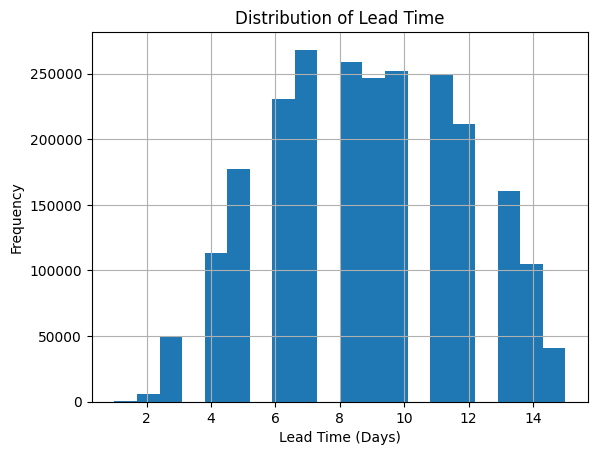

In [41]:
# Histogram to check the distribution of lead times
df1['LeadTime'].hist(bins=20)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

#### Outlier Detection


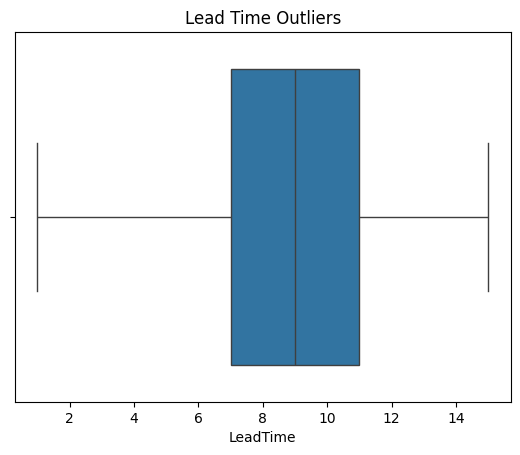

In [42]:
# Box plot to detect outliers in lead time
sns.boxplot(x='LeadTime', data=df1)
plt.title('Lead Time Outliers')
plt.show()


### Feature Engineering & Transformation

In [43]:
df2 = df1.copy()

##### Log Transformation

In [44]:
df2['LogLeadTime'] = np.log(df1['LeadTime'] + 1)

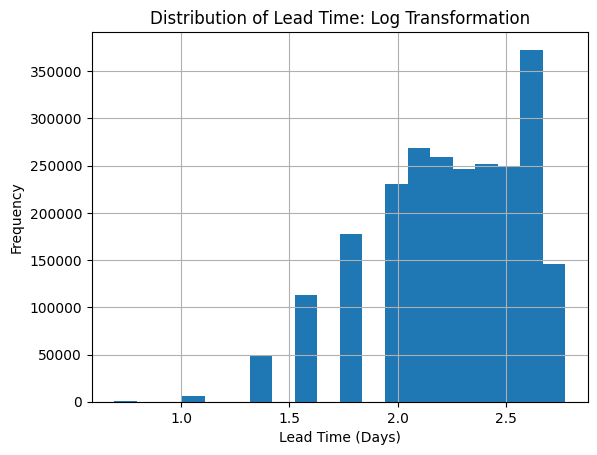

In [45]:
# Histogram to check the distribution of lead times
df2['LogLeadTime'].hist(bins=20)
plt.title('Distribution of Lead Time: Log Transformation')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

##### Creating Time Features
- dt.days 
- dt.weekday: The day of the week with Monday=0, Sunday=6.
- dt.month ...

In [46]:
df2['OrderWeekday'] = df1['PODate'].dt.weekday

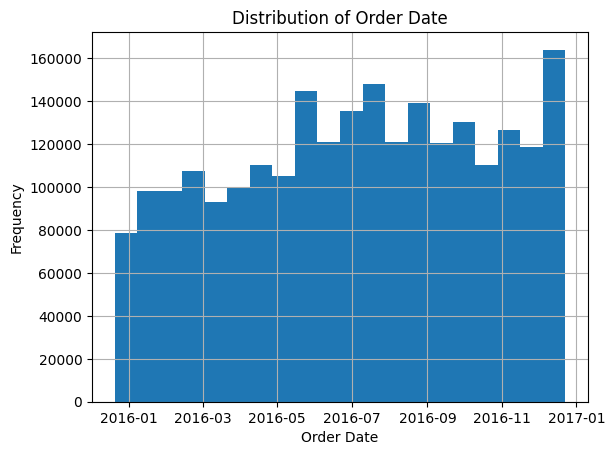

In [47]:
# Histogram to check the distribution of lead times
df2['PODate'].hist(bins=20)
plt.title('Distribution of Order Date')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.show()

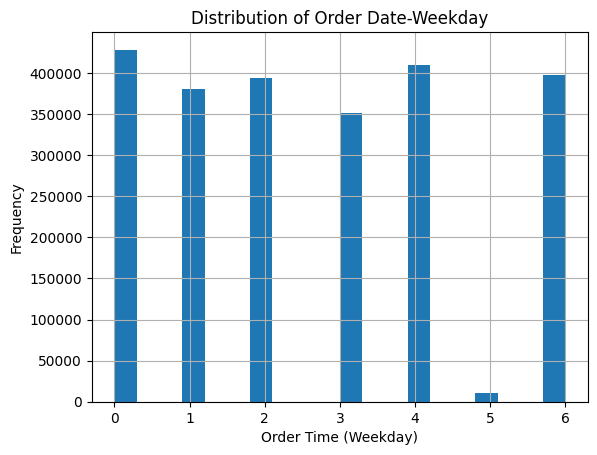

In [48]:
# The day of the week with Monday=0, Sunday=6.
df2['OrderWeekday'].hist(bins=20)
plt.title('Distribution of Order Date-Weekday')
plt.xlabel('Order Time (Weekday)')
plt.ylabel('Frequency')
plt.show()

### Vendor

#### Group Analysis: Summary Statistics
- Group by

In [49]:

df1.groupby('VendorNumber').agg({
    'LeadTime': ['mean', 'min', 'max'],
    'OrderTime': ['mean', 'min', 'max'],
    'PaymentLT': ['mean',  'min', 'max']
})

LeadTime         OrderTime          PaymentLT        
                  mean min max      mean min max       mean min max
VendorNumber                                                       
10000         9.047143   1  15  7.199618   3  14  35.360227  25  47
1003          8.795918   3  15  7.836735   4  12  33.816327  24  47
10050         9.172727   3  15  8.146970   3  13  35.816667  23  48
105           9.017544   2  15  7.578947   3  12  36.210526  25  45
10754         8.594918   1  15  7.270876   3  14  35.821156  24  48
...                ...  ..  ..       ...  ..  ..        ...  ..  ..
9751          7.696970   2  13  8.818182   5  12  37.757576  26  48
9815          9.350351   1  15  7.634451   3  14  35.400500  23  46
9819          8.304313   1  15  7.302476   3  14  35.604575  23  48
98450         8.822163   1  15  7.122760   3  14  35.007963  23  47
99166         8.536585   3  14  8.487805   3  12  35.756098  27  48

[126 rows x 9 columns]

In [50]:
summary_vendor = df1.groupby('VendorNumber').agg({
                'LeadTime': ['mean', 'min', 'max'],
                'OrderTime': ['mean', 'min', 'max'],
                'PaymentLT': ['mean',  'min', 'max']
            })


##### Top5 Vendor sorted by OrderTime

In [51]:
#ascending=False
summary_vendor.sort_values(('OrderTime', 'mean'), ascending=False).head(5)

LeadTime          OrderTime          PaymentLT        
                   mean min max       mean min max       mean min max
VendorNumber                                                         
201359         9.000000   9   9  13.000000  13  13  38.000000  38  38
54             7.000000   7   7  10.000000  10  10  44.000000  44  44
4901          11.000000  11  11  10.000000  10  10  41.000000  41  41
2              9.307692   4  11   9.615385   7  11  31.923077  27  48
90059          7.431818   2  13   9.318182   5  13  32.727273  29  40

In [52]:
#ascending=True
summary_vendor.sort_values(('OrderTime', 'mean'), ascending=True).head(5)


LeadTime         OrderTime          PaymentLT        
                   mean min max      mean min max       mean min max
VendorNumber                                                        
9099          13.000000  13  13  5.000000   5   5  31.000000  31  31
3951          12.392857   6  15  5.321429   3   9  26.642857  23  42
5083           6.600000   4   8  5.950000   4  12  42.100000  32  47
1650           8.321888   3  15  6.948498   3  12  36.613734  27  47
1703           7.466667   2  14  7.000000   3  12  39.266667  27  47

__Observation__: 
- Good performance Vendor(LeadTime) -> 9099, 3951, 5083, 1650, 1703 ( mean: 5~ 7 days)
- Bad performance vendor(LeadTime) -> 201359, 54, 4901, 2, 90059 (mean: 9~13 days)

##### Get Top5 List

In [53]:
# Get the sorted top 5 rows based on 'OrderTime' mean
top_bad_5 = summary_vendor.sort_values(('OrderTime', 'mean'), ascending=False).head(5)
top_bad_10 = summary_vendor.sort_values(('OrderTime', 'mean'), ascending=False).head(10)

# Retrieve the index of the top 5 rows
top_bad_5_index = top_bad_5.index.tolist()
top_bad_10_index = top_bad_10.index.tolist()

print(top_bad_5_index)
print(top_bad_10_index)

['201359', '54', '4901', '2', '90059']
['201359', '54', '4901', '2', '90059', '9751', '90057', '90026', '99166', '9165']


In [54]:
# Get the sorted top 5 rows based on 'OrderTime' mean
top_good_5 = summary_vendor.sort_values(('OrderTime', 'mean'), ascending=True).head(5)
# Retrieve the index of the top 5 rows
top_good_5_index = top_good_5.index.tolist()

print(top_good_5_index)

['9099', '3951', '5083', '1650', '1703']


##### Bad Performance Vendor

###### Bar chart

['201359', '54', '4901', '2', '90059']


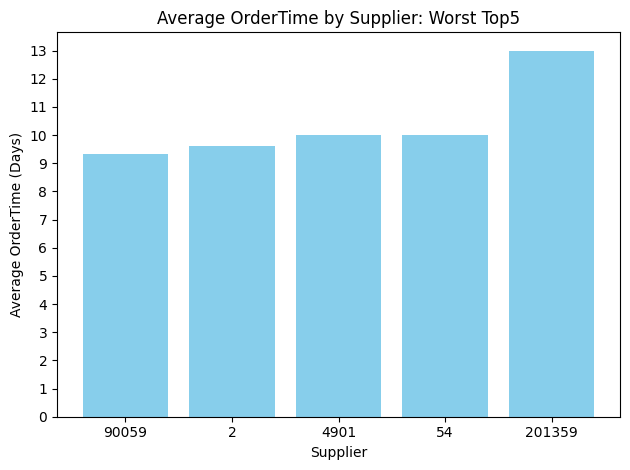

In [55]:
# Filter Top 5 Vendor 
print(top_bad_5_index)
filtered_top5_bad_vendor= df1[df1['VendorNumber'].isin(top_bad_5_index)]

# Group by Supplier and calculate the mean lead-time
supplier_performance = filtered_top5_bad_vendor.groupby('VendorNumber')['OrderTime'].mean().reset_index()

#Sort by ascending 
supplier_performance = supplier_performance.sort_values(by='OrderTime', ascending=True)

# Plot the lead-time performance using a bar chart
plt.bar(supplier_performance['VendorNumber'], supplier_performance['OrderTime'], color='skyblue')

# Add titles and labels
plt.title('Average OrderTime by Supplier: Worst Top5')
plt.xlabel('Supplier')
plt.ylabel('Average OrderTime (Days)')

plt.yticks(ticks=range(0, int(supplier_performance['OrderTime'].max()) + 1))

# Display the chart
plt.tight_layout()
plt.show()

['201359', '54', '4901', '2', '90059', '9751', '90057', '90026', '99166', '9165']


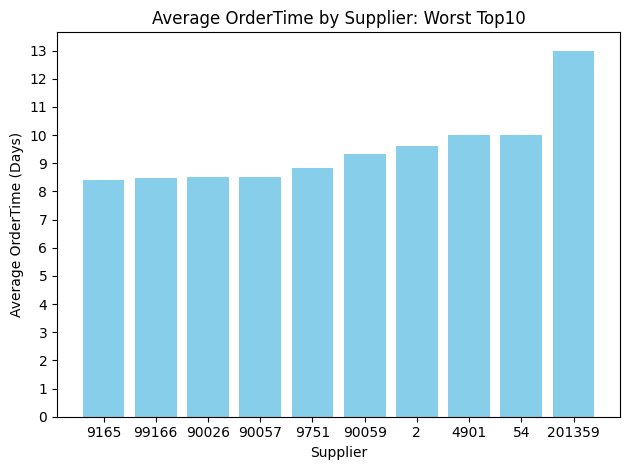

In [56]:
# Filter Top 5 Vendor 
print(top_bad_10_index)
filtered_top10_bad_vendor= df1[df1['VendorNumber'].isin(top_bad_10_index)]

# Group by Supplier and calculate the mean lead-time
supplier_performance = filtered_top10_bad_vendor.groupby('VendorNumber')['OrderTime'].mean().reset_index()

#Sort by ascending 
supplier_performance = supplier_performance.sort_values(by='OrderTime', ascending=True)

# Plot the lead-time performance using a bar chart
plt.bar(supplier_performance['VendorNumber'], supplier_performance['OrderTime'], color='skyblue')

# Add titles and labels
plt.title('Average OrderTime by Supplier: Worst Top10')
plt.xlabel('Supplier')
plt.ylabel('Average OrderTime (Days)')

plt.yticks(ticks=range(0, int(supplier_performance['OrderTime'].max()) + 1))

# Display the chart
plt.tight_layout()
plt.show()

###### BoxPlot

<Figure size 800x600 with 0 Axes>

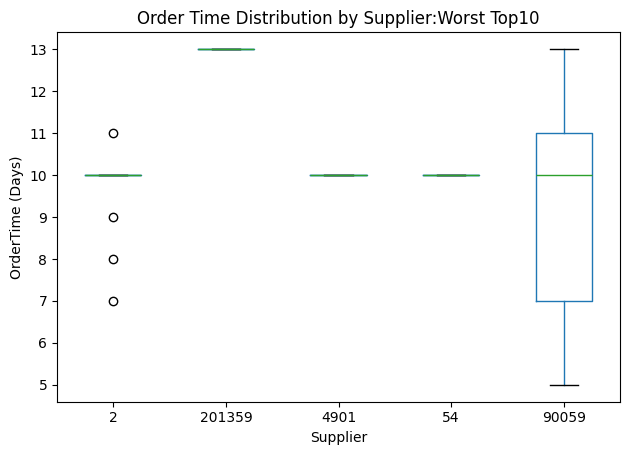

In [57]:
import matplotlib.pyplot as plt

# Create a box plot to show the distribution of lead times for each supplier
plt.figure(figsize=(8, 6))
filtered_top5_bad_vendor.boxplot(column='OrderTime', by='VendorNumber', grid=False)

# Add titles and labels
plt.title('Order Time Distribution by Supplier:Worst Top10')
plt.suptitle('')  # Removes default boxplot title
plt.xlabel('Supplier')
plt.ylabel('OrderTime (Days)')

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

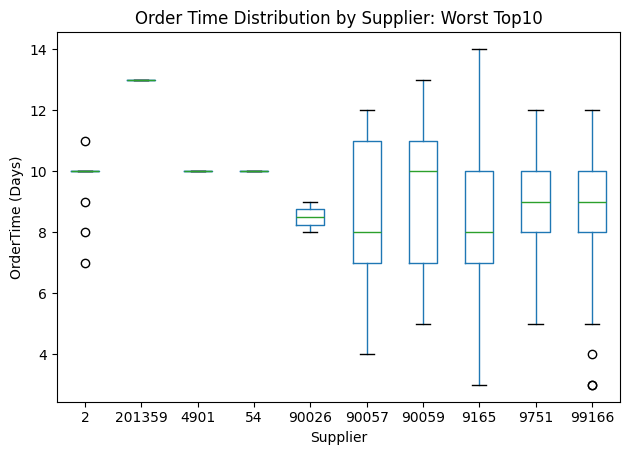

In [58]:
import matplotlib.pyplot as plt

# Create a box plot to show the distribution of lead times for each supplier
plt.figure(figsize=(8, 6))
filtered_top10_bad_vendor.boxplot(column='OrderTime', by='VendorNumber', grid=False)

# Add titles and labels
plt.title('Order Time Distribution by Supplier: Worst Top10')
plt.suptitle('')  # Removes default boxplot title
plt.xlabel('Supplier')
plt.ylabel('OrderTime (Days)')

# Display the plot
plt.tight_layout()
plt.show()


###### Violin Plot

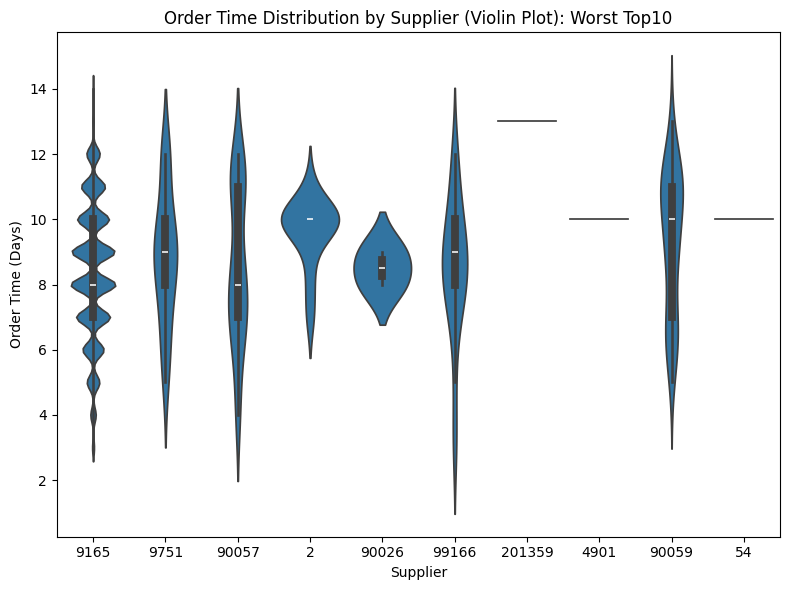

In [59]:
import seaborn as sns

# Create a violin plot to show the distribution and density of lead times for each supplier
plt.figure(figsize=(8, 6))
sns.violinplot(x='VendorNumber', y='OrderTime', data=filtered_top10_bad_vendor)

# Add titles and labels
plt.title('Order Time Distribution by Supplier (Violin Plot): Worst Top10')
plt.xlabel('Supplier')
plt.ylabel('Order Time (Days)')

# Display the plot
plt.tight_layout()
plt.show()

In [60]:
filtered_top10_bad_vendor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84173 entries, 7244 to 2369246
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InventoryId        84173 non-null  object        
 1   Store              84173 non-null  object        
 2   Brand              84173 non-null  object        
 3   Description        84173 non-null  object        
 4   Size               84173 non-null  object        
 5   VendorNumber       84173 non-null  object        
 6   VendorName         84173 non-null  object        
 7   PONumber           84173 non-null  object        
 8   PODate             84173 non-null  datetime64[ns]
 9   ReceivingDate      84173 non-null  datetime64[ns]
 10  InvoiceDate        84173 non-null  datetime64[ns]
 11  PayDate            84173 non-null  datetime64[ns]
 12  PurchasePrice      84173 non-null  float64       
 13  Quantity           84173 non-null  int64         
 14  Dollar

/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_48904/1680296372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top10_bad_vendor['PODate'] = pd.to_datetime(filtered_top10_bad_vendor['PODate'])


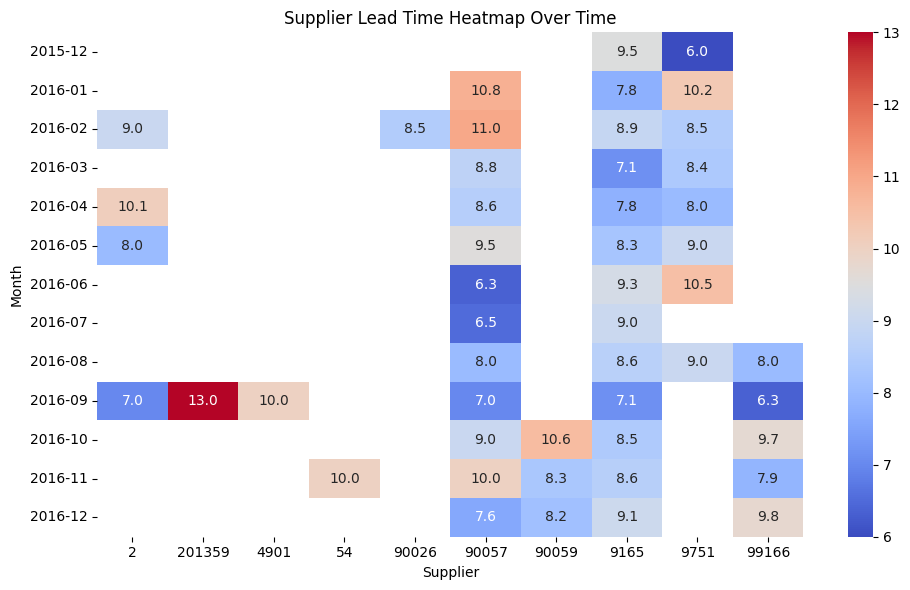

In [61]:
import seaborn as sns
import pandas as pd

# Assuming 'PODate' is in datetime format, create a pivot table with average lead time
filtered_top10_bad_vendor['PODate'] = pd.to_datetime(filtered_top10_bad_vendor['PODate'])
lead_time_heatmap_data = filtered_top10_bad_vendor.pivot_table(index=filtered_top10_bad_vendor['PODate'].dt.to_period('M'), columns='VendorNumber', values='OrderTime', aggfunc='mean')

# Create a heatmap to show lead time trends over time for each supplier
plt.figure(figsize=(10, 6))
sns.heatmap(lead_time_heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")

# Add titles and labels
plt.title('Supplier Lead Time Heatmap Over Time')
plt.xlabel('Supplier')
plt.ylabel('Month')

# Display the plot
plt.tight_layout()
plt.show()


##### Good Performance Vendor

###### Bar chart

['9099', '3951', '5083', '1650', '1703']


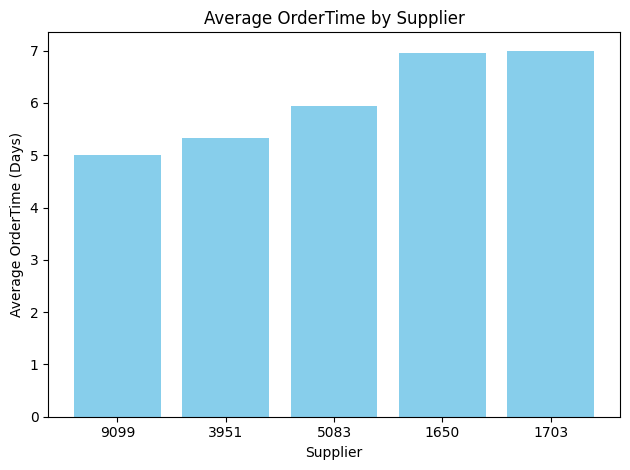

In [62]:
# Filter Top 5 Vendor 
print(top_good_5_index)
filtered_top5_good_vendor= df1[df1['VendorNumber'].isin(top_good_5_index)]

# Group by Supplier and calculate the mean lead-time
supplier_performance = filtered_top5_good_vendor.groupby('VendorNumber')['OrderTime'].mean().reset_index()

#Sort by ascending 
supplier_performance = supplier_performance.sort_values(by='OrderTime', ascending=True)

# Plot the lead-time performance using a bar chart
plt.bar(supplier_performance['VendorNumber'], supplier_performance['OrderTime'], color='skyblue')

plt.title('Average OrderTime by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Average OrderTime (Days)')

plt.yticks(ticks=range(0, int(supplier_performance['OrderTime'].max()) + 1))

# Display the chart
plt.tight_layout()
plt.show()

###### Box plot

<Figure size 800x600 with 0 Axes>

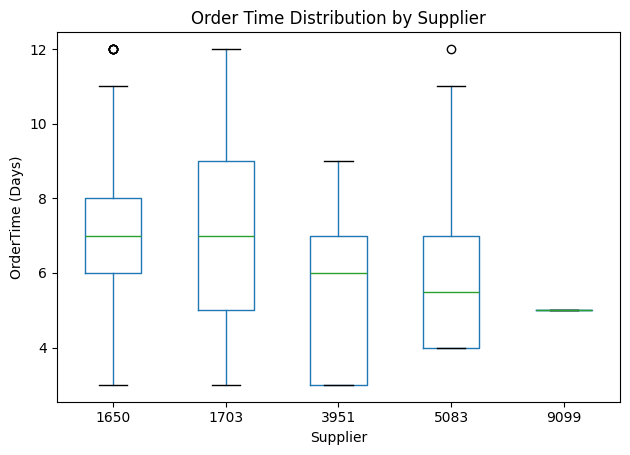

In [63]:
import matplotlib.pyplot as plt

# Create a box plot to show the distribution of lead times for each supplier
plt.figure(figsize=(8, 6))
filtered_top5_good_vendor.boxplot(column='OrderTime', by='VendorNumber', grid=False)

# Add titles and labels
plt.title('Order Time Distribution by Supplier')
plt.suptitle('')  # Removes default boxplot title
plt.xlabel('Supplier')
plt.ylabel('OrderTime (Days)')

# Display the plot
plt.tight_layout()
plt.show()


### Store

##### Top5 Vendor sorted by PaymentLT

In [64]:
summary_store = df1.groupby('Store').agg({
                'LeadTime': ['mean', 'min', 'max'],
                'OrderTime': ['mean', 'min', 'max'],
                'PaymentLT': ['mean',  'min', 'max']
            })


In [65]:
#ascending=False
summary_store.sort_values(('PaymentLT', 'mean'), ascending=False).head(5)

LeadTime         OrderTime          PaymentLT        
            mean min max      mean min max       mean min max
Store                                                        
3      10.905316   3  15  5.676633   3  13  35.873754  23  48
46      8.739418   1  15  7.608759   3  13  35.810374  23  48
64      9.153513   1  15  7.363128   3  14  35.795016  23  48
36      7.909091   2  15  8.527153   3  14  35.776178  23  48
5       7.025381   1  15  9.377167   3  13  35.773393  23  48

In [66]:
summary_store.sort_values(('PaymentLT', 'mean'), ascending=True).head(5)

LeadTime         OrderTime          PaymentLT        
           mean min max      mean min max       mean min max
Store                                                       
81     8.798848   2  15  7.581688   3  14  34.848896  23  48
78     8.829229   1  15  7.679663   3  13  35.465971  23  48
50     8.992688   1  15  7.507541   3  14  35.532528  23  48
22     8.905783   1  15  7.617527   3  14  35.559075  23  48
28     9.723768   2  15  6.772420   3  13  35.564601  23  48

__Observation__: No significance difference ( mean: 34 days, min:23, max:48) -> Payment term 이 존재하기 때문에 Store별 큰 차이가 없음 

### InventoryCategory

In [67]:
summary_inventoryCat = df1.groupby('InventoryCategory').agg({
                'LeadTime': ['mean', 'min', 'max'],
                'OrderTime': ['mean', 'min', 'max'],
                'PaymentLT': ['mean',  'min', 'max']
            })


In [68]:
summary_inventoryCat.sort_values(('OrderTime', 'mean'), ascending=True).head(5)

LeadTime         OrderTime          PaymentLT        
                       mean min max      mean min max       mean min max
InventoryCategory                                                       
SWORDBREAK         9.928480   3  15  6.558732   4  13  35.706887  23  48
BROMWICH           9.779584   1  15  6.716070   3  14  35.629975  23  48
KILMARNOCK         9.740173   1  15  6.760387   3  13  35.626578  23  48
BLACKPOOL          9.740405   1  15  6.776263   3  14  35.644183  23  48
BREDWARDINE        9.623484   1  15  6.824917   3  14  35.590814  23  48

In [69]:
summary_inventoryCat.sort_values(('OrderTime', 'mean'), ascending=False).head(5)

LeadTime         OrderTime          PaymentLT        
                       mean min max      mean min max       mean min max
InventoryCategory                                                       
LUNDY              6.765730   1  14  9.602961   3  14  35.736457  23  48
AYLESBURY          6.915412   1  14  9.466258   3  14  35.742331  23  48
GRAYCOTT           7.040621   1  15  9.417981   3  14  35.714017  23  48
PAETHSMOUTH        7.023144   1  15  9.404703   3  14  35.693812  23  48
SUTTON             7.025381   1  15  9.377167   3  13  35.773393  23  48

__Observation__: 
- LUNDY,AYLESBURY,GRAYCOTT, PAETHSMOUTH,SUTTON  : Average OrderTime = 9days 
- SWORDBREAK, BROMWICH, KILMARNOCK, BLACKPOOL, BREDWARDINE: Average OrderTime = 6days

### PO Transaction Trend

#### Purchase Order Counts by Date and classification

##### Group Analysis: Line chart
- Groupby
- reset_index

In [70]:
podate_att = df1.groupby(['PODate', 'Classification']).apply(lambda x: x['PODate'].count()).reset_index(name='Counts')

# Creating the line plot
fig = px.line(podate_att, x='PODate', y='Counts', color='Classification', title='Purchase Order Counts by Date and Classification')

# Show the plot
fig.show()


/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_48904/3960135435.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  podate_att = df1.groupby(['PODate', 'Classification']).apply(lambda x: x['PODate'].count()).reset_index(name='Counts')


##### Filter

In [71]:
df1[(df1['InventoryCategory'] == 'ABERDEEN') & (df1['PODate'] == '2016-06-27')]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,InventoryCategory
1097108,51_ABERDEEN_8202,51,8202,Sambuca Romana,750mL,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-06,2016-07-16,2016-08-13,13.33,11,146.63,1,10,9,28,ABERDEEN
1097149,51_ABERDEEN_5630,51,5630,Cabin Fever Maple Liqueur,750mL,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-05,2016-07-16,2016-08-13,14.17,12,170.04,1,11,8,28,ABERDEEN
1097278,51_ABERDEEN_2753,51,2753,Johnnie Walker Black Label,1.75L,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-06,2016-07-16,2016-08-13,44.77,12,537.24,1,10,9,28,ABERDEEN
1097304,51_ABERDEEN_3746,51,3746,Gordons Vodka 80 Proof,1.75L,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-05,2016-07-16,2016-08-13,8.52,12,102.24,1,11,8,28,ABERDEEN
1097490,51_ABERDEEN_3042,51,3042,Ciroc Red Berry Vodka,375mL,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-06,2016-07-16,2016-08-13,8.63,11,94.93,1,10,9,28,ABERDEEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144619,51_ABERDEEN_15393,51,15393,Cupcake Pnt Grigio,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-06,2016-07-19,2016-08-18,4.51,12,54.12,2,13,9,30,ABERDEEN
1144704,51_ABERDEEN_14701,51,14701,Cupcake Red Velvet,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-06,2016-07-19,2016-08-18,4.57,24,109.68,2,13,9,30,ABERDEEN
1144824,51_ABERDEEN_14342,51,14342,Cupcake Pnt Nr,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-08,2016-07-19,2016-08-18,4.60,10,46.00,2,11,11,30,ABERDEEN
1145019,51_ABERDEEN_14342,51,14342,Cupcake Pnt Nr,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-06,2016-07-19,2016-08-18,4.60,12,55.20,2,13,9,30,ABERDEEN


##### Correlation Matrix

In [72]:
# Select only numeric columns from the DataFrame
numeric_df1 = df1[numerical_features]

# Calculate the correlation matrix on the numeric data
correlation_matrix = numeric_df1.corr()

# Display the correlation matrix
print(correlation_matrix)


               PurchasePrice  Quantity   Dollars  LeadTime  OrderTime  \
PurchasePrice       1.000000 -0.082951  0.211339  0.013777   0.001129   
Quantity           -0.082951  1.000000  0.596777 -0.001462   0.005982   
Dollars             0.211339  0.596777  1.000000  0.006747   0.004466   
LeadTime            0.013777 -0.001462  0.006747  1.000000  -0.300337   
OrderTime           0.001129  0.005982  0.004466 -0.300337   1.000000   
PaymentLT          -0.008362 -0.009532 -0.009275 -0.430060   0.002898   

               PaymentLT  
PurchasePrice  -0.008362  
Quantity       -0.009532  
Dollars        -0.009275  
LeadTime       -0.430060  
OrderTime       0.002898  
PaymentLT       1.000000  


In [73]:
pd.DataFrame(correlation_matrix).to_clipboard()

##### Heatmap - correlation matrix

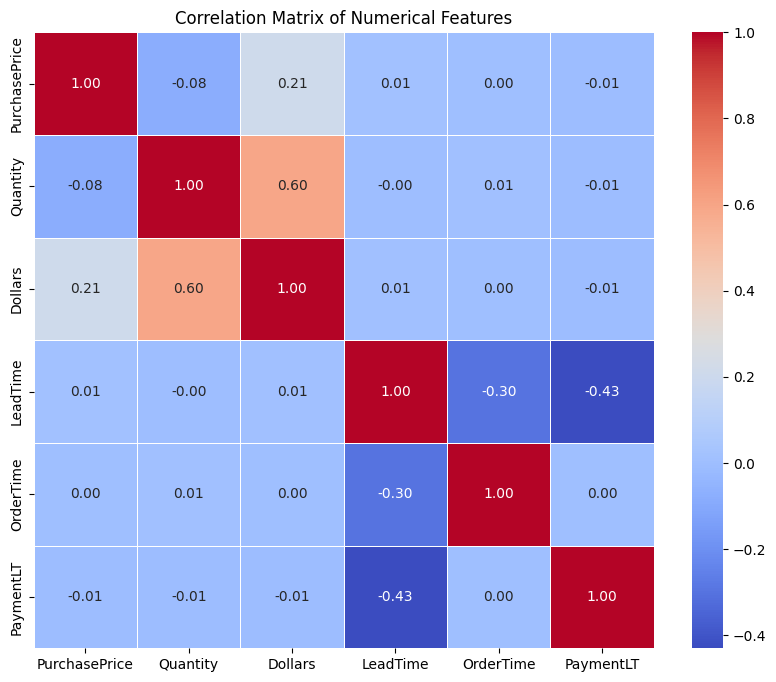

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df1 = df1[numerical_features]

# Calculate the correlation matrix on the numeric data
correlation_matrix = numeric_df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [75]:
filtered_top5_good_vendor['Classification'].value_counts()

Classification
2    326
1     16
Name: count, dtype: int64

In [76]:
filtered_top5_good_vendor['Classification'].value_counts()

Classification
2    326
1     16
Name: count, dtype: int64

/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_48904/4066491568.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



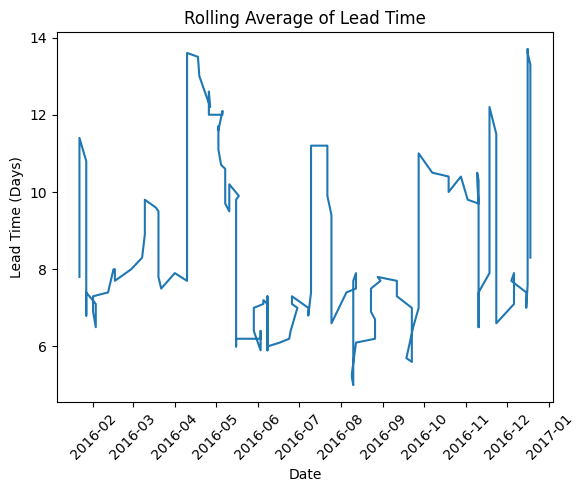

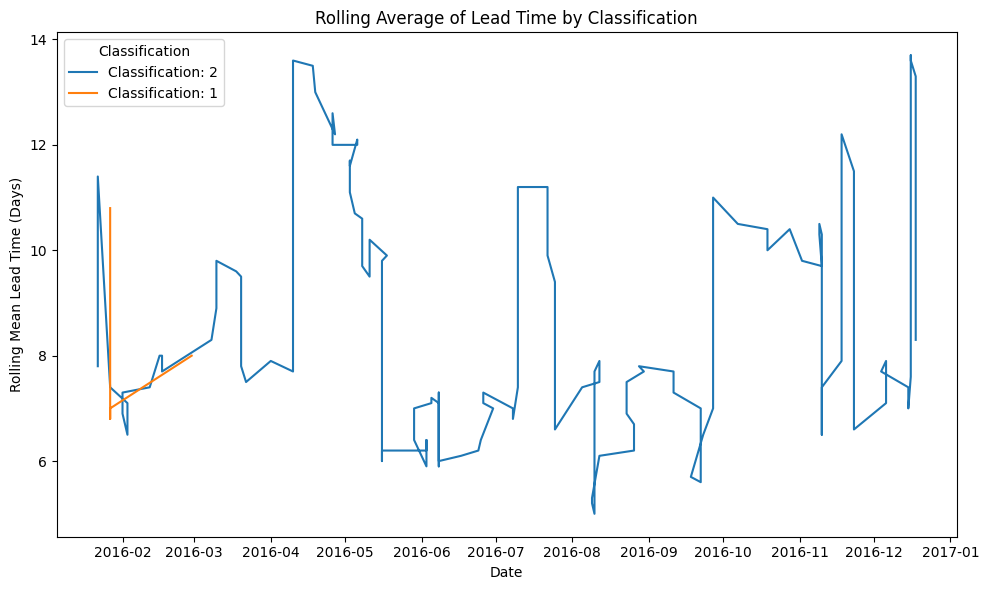

In [77]:
filtered_top5_good_vendor['RollingMeanLeadTime'] = filtered_top5_good_vendor['LeadTime'].rolling(window=10).mean()
plt.plot(filtered_top5_good_vendor['PODate'], filtered_top5_good_vendor['RollingMeanLeadTime'])
plt.title('Rolling Average of Lead Time')
plt.xlabel('Date')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()
# Plot the rolling mean for each InventoryID
plt.figure(figsize=(10, 6))


for inventory_class in filtered_top5_good_vendor['Classification'].unique():
    inventory_data = filtered_top5_good_vendor[filtered_top5_good_vendor['Classification'] == inventory_class]
    plt.plot(inventory_data['PODate'], inventory_data['RollingMeanLeadTime'], label=f'Classification: {inventory_class}')

# Add title and labels
plt.title('Rolling Average of Lead Time by Classification')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Lead Time (Days)')
plt.legend(title='Classification')

# Display the plot
plt.tight_layout()
plt.show()

#### Purchase Order counts by PODate and InventoryCategory

##### Group Analysis: Line chart
- Groupby
- reset_index

In [78]:
podate_att = df1.groupby(['PODate', 'InventoryCategory']).apply(lambda x: x['PODate'].count()).reset_index(name='Counts')

# Creating the line plot
fig = px.line(podate_att, x='PODate', y='Counts', color='InventoryCategory', title='Purchase Order Counts by Date and InventoryCategory')

# Show the plot
fig.show()


/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_48904/858019498.py:1: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#### Identify Seasonal Pattern 

##### Seasonal Decomposition of Lead Time
- period=12 : assumes there is some monthly seasonality if data is monthly: You can adjust this depending on the frequency of your data. If you’re working with daily data but expect annual seasonality, you might choose period=365.
- Numeric Data: You need to choose a numeric column (like LeadTime, Order Count, or similar) for the decomposition.

<Figure size 1400x1000 with 0 Axes>

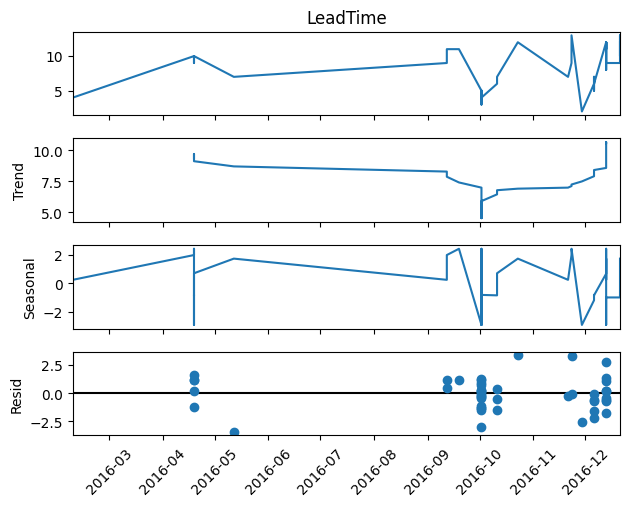

In [79]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure PODate is a datetime object and set it as the index
df_filtered_top5_bad_vendor = filtered_top5_bad_vendor.copy()
df_filtered_top5_bad_vendor.set_index('PODate', inplace=True)

# Perform seasonal decomposition on the LeadTime column
# Ensure the 'LeadTime' column is numeric and contains the data to be decomposed
decomposition = seasonal_decompose(df_filtered_top5_bad_vendor['LeadTime'], model='additive', period=12)

plt.figure(figsize=(14, 10))
# Plot the decomposed components (trend, seasonal, and residual)
decomposition.plot()

plt.xticks(rotation=45)
plt.show()


##### Time Series Trend - Rolling mean Lead Time

/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_48904/3226776591.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



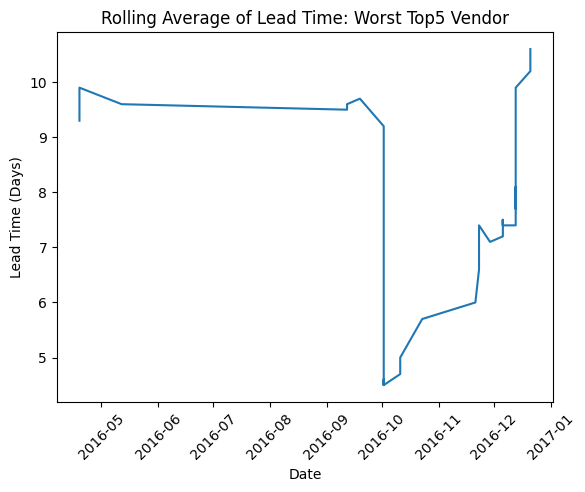

In [80]:
filtered_top5_bad_vendor['RollingMeanLeadTime'] = filtered_top5_bad_vendor['LeadTime'].rolling(window=10).mean()
plt.plot(filtered_top5_bad_vendor['PODate'], filtered_top5_bad_vendor['RollingMeanLeadTime'])
plt.title('Rolling Average of Lead Time: Worst Top5 Vendor')
plt.xlabel('Date')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()

In [81]:
filtered_top5_bad_vendor['RollingMeanLeadTime'].describe()

count    51.000000
mean      7.549020
std       2.027548
min       4.500000
25%       5.850000
50%       7.500000
75%       9.400000
max      10.600000
Name: RollingMeanLeadTime, dtype: float64

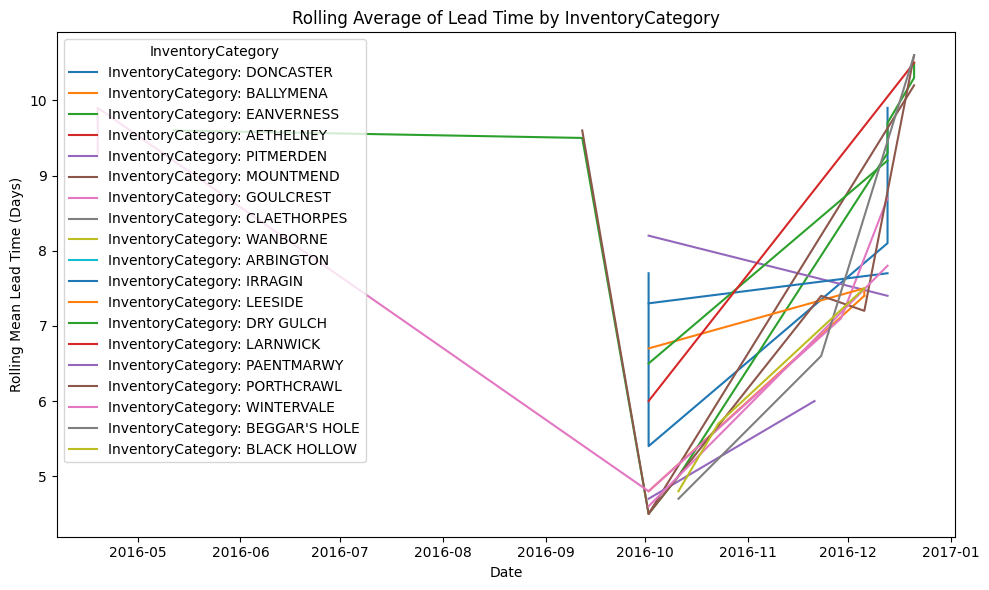

In [82]:
# Plot the rolling mean for each InventoryID
plt.figure(figsize=(10, 6))
for inventory_cat in filtered_top5_bad_vendor['InventoryCategory'].unique():
    inventory_data = filtered_top5_bad_vendor[filtered_top5_bad_vendor['InventoryCategory'] == inventory_cat]
    plt.plot(inventory_data['PODate'], inventory_data['RollingMeanLeadTime'], label=f'InventoryCategory: {inventory_cat}')

# Add title and labels
plt.title('Rolling Average of Lead Time by InventoryCategory')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Lead Time (Days)')
plt.legend(title='InventoryCategory')

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_48904/1846777617.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



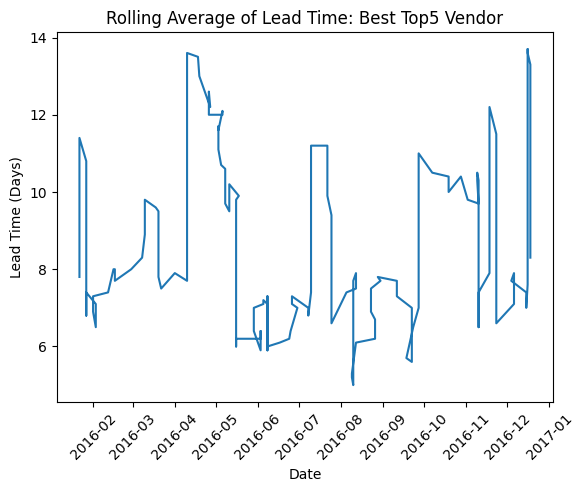

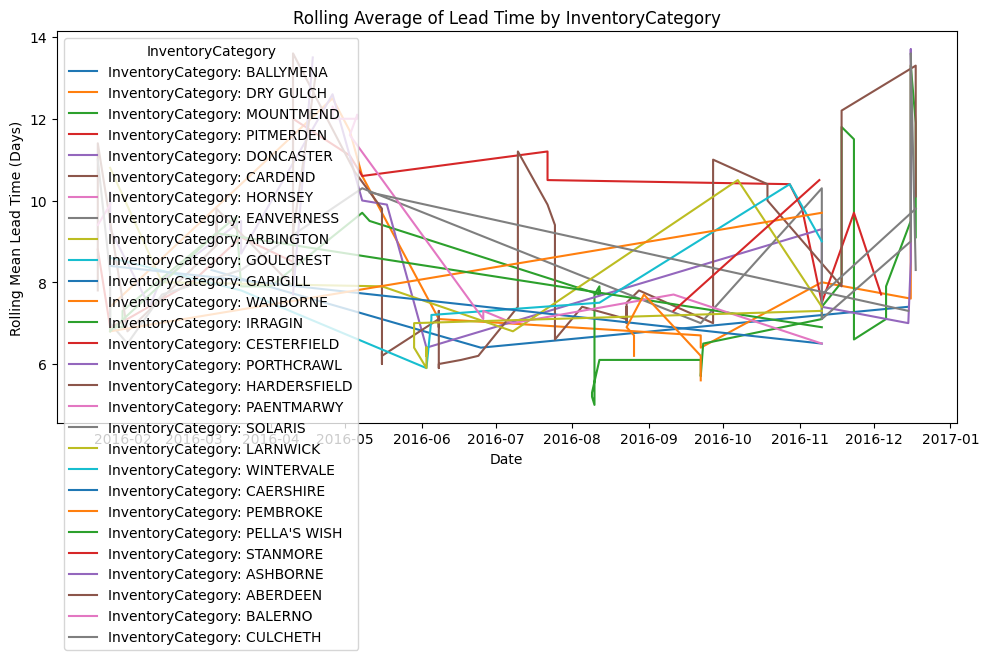

In [84]:
filtered_top5_good_vendor['RollingMeanLeadTime'] = filtered_top5_good_vendor['LeadTime'].rolling(window=10).mean()
plt.plot(filtered_top5_good_vendor['PODate'], filtered_top5_good_vendor['RollingMeanLeadTime'])
plt.title('Rolling Average of Lead Time: Best Top5 Vendor')
plt.xlabel('Date')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()
# Plot the rolling mean for each InventoryID
plt.figure(figsize=(10, 6))


for inventory_cat in filtered_top5_good_vendor['InventoryCategory'].unique():
    inventory_data = filtered_top5_good_vendor[filtered_top5_good_vendor['InventoryCategory'] == inventory_cat]
    plt.plot(inventory_data['PODate'], inventory_data['RollingMeanLeadTime'], label=f'InventoryCategory: {inventory_cat}')

# Add title and labels
plt.title('Rolling Average of Lead Time by InventoryCategory')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Lead Time (Days)')
plt.legend(title='InventoryCategory')

# Display the plot
plt.tight_layout()
plt.show()